In [1]:
import pandas as pd
import numpy as np


In [2]:
data_frame=pd.read_csv("1553768847-housing.csv")
print(data_frame.sample(5))
print(data_frame.info())
print(data_frame.describe())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1792     -122.38     37.91                  18         3507           711.0   
12702    -121.41     38.59                  18         5527          1446.0   
5032     -118.33     33.98                  28         3889          1199.0   
10180    -117.96     33.87                  35         1972           367.0   
2938     -118.94     35.36                  19         2714           512.0   

       population  households  median_income ocean_proximity  \
1792         1224         676         5.0524        NEAR BAY   
12702        2883        1305         2.6485          INLAND   
5032         3121        1046         1.8806       <1H OCEAN   
10180        1152         356         3.7222       <1H OCEAN   
2938         1823         500         3.1281          INLAND   

       median_house_value  
1792               269800  
12702              114500  
5032               113900  
10180              187500  


In [3]:
print("Are there any duplicates ....")
print(data_frame.isna().sum())

Are there any duplicates ....
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [4]:
data_frame["total_bedrooms"].fillna(data_frame["total_bedrooms"].mean())

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [5]:
print(data_frame.dtypes)


longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
print(data_frame["ocean_proximity"].value_counts())
data_frame["ocean_proximity"]=encoder.fit_transform(data_frame["ocean_proximity"])
print(encoder.classes_)


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [7]:
print(data_frame["ocean_proximity"].value_counts())

ocean_proximity
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64


In [8]:
print(data_frame.select_dtypes("object"))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[20640 rows x 0 columns]


In [9]:
print(data_frame.duplicated().any())

False


In [10]:
X=data_frame.drop(columns=["median_house_value"],inplace=False)
y=data_frame["median_house_value"]

In [11]:
print(X.shape)
print(y.shape)

(20640, 9)
(20640,)


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)


In [13]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
import tensorflow as tf


In [15]:
x_train_tf=tf.Variable(x_train)
print(x_train.shape)
print(x_train_tf.shape)
print(type(x_train_tf))

(16512, 9)
(16512, 9)
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


In [16]:
x_test_tf=tf.Variable(x_test)
y_train_tf=tf.Variable(y_train)
y_test_tf=tf.Variable(y_test)
print(type(x_test_tf))
print(type(y_test_tf))
print(type(x_train_tf))
print(y_test_tf.shape)

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
(4128,)


In [17]:
train_dataset=tf.data.Dataset.from_tensor_slices((x_train_tf,y_train_tf))
test_dataset=tf.data.Dataset.from_tensor_slices((x_test_tf,y_test_tf))
train_dataset=train_dataset.shuffle(buffer_size=train_dataset.cardinality().numpy())
test_dataset=test_dataset.shuffle(buffer_size=test_dataset.cardinality().numpy())
train_dataset=train_dataset.batch(32)
test_dataset=test_dataset.batch(32)
train_dataset=train_dataset.prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.prefetch(tf.data.AUTOTUNE)
for batch in train_dataset:
        (X,y)=batch
        print(X.shape)
        print(y.shape)
        break


(32, 9)
(32,)


In [18]:
print(type(train_dataset))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [19]:
#model architecture
Model=tf.keras.Sequential([
        tf.keras.Input(shape=(9,)),
        tf.keras.layers.Dense(128,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(128,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(64,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(32,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1)
])

In [20]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,161 (110.00 KB)

 Trainable params: 28,161 (110.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
Model.layers[0].get_weights()[0].shape

(9, 128)

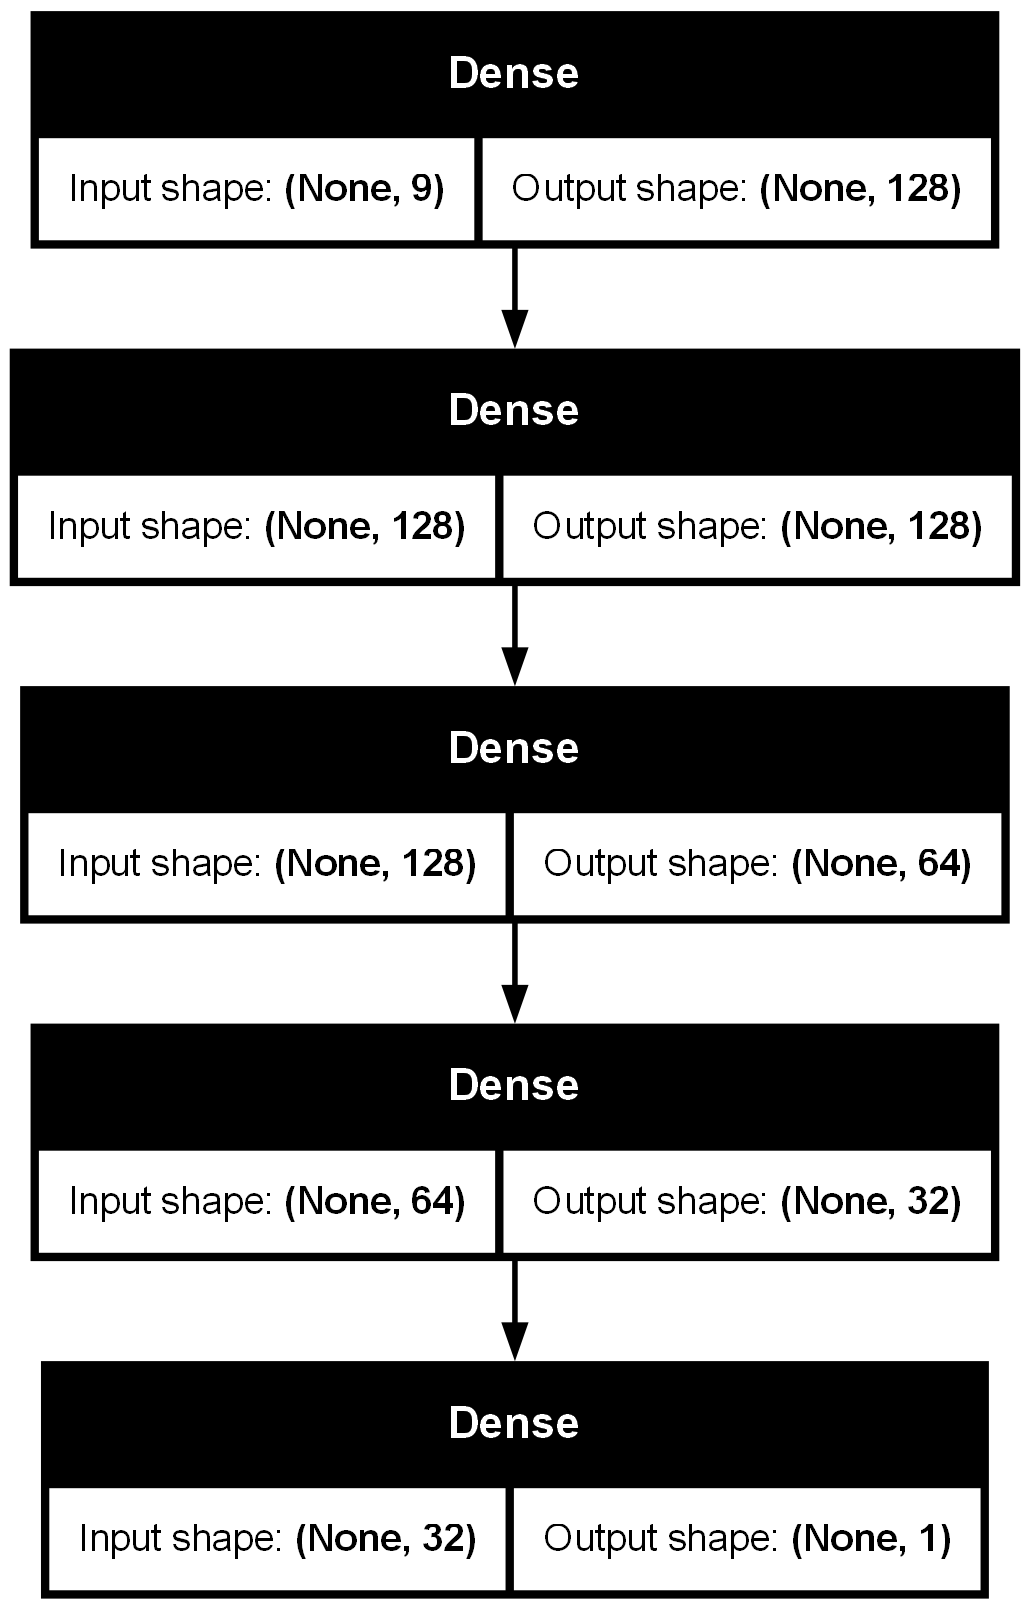

In [23]:
tf.keras.utils.plot_model(Model,show_shapes=True)

In [24]:
Model.compile(
        
                loss=tf.keras.losses.Huber(delta=0.1),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredError()]
     
)

In [25]:
Model.fit(
        train_dataset,
        epochs=20,
        verbose=1
)

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 13317.7607 - mean_absolute_error: 133177.6250 - mean_squared_error: 31844270080.0000
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7956.7163 - mean_absolute_error: 79567.2188 - mean_squared_error: 10701475840.0000
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7616.3062 - mean_absolute_error: 76163.1016 - mean_squared_error: 9792287744.0000
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7243.4492 - mean_absolute_error: 72434.5547 - mean_squared_error: 8878705664.0000
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6812.5347 - mean_absolute_error: 68125.3828 - mean_squared_error: 8115290112.0000
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6575.4419 - mean_absolute_error: 65754.4766 - mean_squared_error: 7585663488.0000
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6371.5176 - mean_absolute_error: 63715.2148 - mean_squared_error: 7275646976.0000
Ep

In [ ]:
test_dataset=test_dataset.map(lambda x,y : x)
y_preds=Model.predict(test_dataset)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [38]:
Model.evaluate(x_test_tf,y_test_tf)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mean_absolute_error: nan - mean_squared_error: nan


[nan, nan, nan]

In [29]:
print(y_preds.shape)

(4128, 1)


In [30]:
print(y_test_tf.shape)

(4128,)


In [33]:
print(y_preds)

[[186227.62]
 [263976.44]
 [116113.86]
 ...
 [ 79194.52]
 [204416.12]
 [147840.69]]
